#Tugas Praktikum 5 Machine Learning
Kamal Ariq<br>
24060121140130<br>
A1 <br>
Link Dataset : https://archive.ics.uci.edu/dataset/12/balance+scale

#Praktikum

In [10]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [11]:
# Memuat dataset dari url yang telah dipilih
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
names = ['class name', 'left-weight', 'left-distance', 'right-weight', 'right-distance']
dataset = pd.read_csv(url, names=names)

Kode di atas menggunakan library pandas untuk mengambil dataset balance scale. Setelah mengambil dataset, kode tersebut membaca dan memuatnya ke dalam struktur data DataFrame menggunakan fungsi read_csv dari pandas. Nama-nama kolom dataset ditentukan oleh list 'names', yaitu 'class name', 'left-weight', 'left-distance', 'right-weight', dan 'right-distance'.






In [12]:
print(dataset.shape)
print(dataset[:10])
print(np.unique(dataset['class name']))

(625, 5)
  class name  left-weight  left-distance  right-weight  right-distance
0          B            1              1             1               1
1          R            1              1             1               2
2          R            1              1             1               3
3          R            1              1             1               4
4          R            1              1             1               5
5          R            1              1             2               1
6          R            1              1             2               2
7          R            1              1             2               3
8          R            1              1             2               4
9          R            1              1             2               5
['B' 'L' 'R']


### Standarisasi Data

In [13]:
features = ['left-weight', 'left-distance', 'right-weight', 'right-distance']
x = dataset.loc[:, features].values
y = dataset.loc[:,['class name']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,left-weight,left-distance,right-weight,right-distance
0,-1.414214,-1.414214,-1.414214,-1.414214
1,-1.414214,-1.414214,-1.414214,-0.707107
2,-1.414214,-1.414214,-1.414214,0.000000
3,-1.414214,-1.414214,-1.414214,0.707107
4,-1.414214,-1.414214,-1.414214,1.414214


Kode tersebut melakukan beberapa langkah dalam pengolahan data:

1. **Seleksi Fitur:** Memilih fitur-fitur yang akan digunakan untuk analisis, yaitu 'left-weight', 'left-distance', 'right-weight', dan 'right-distance' dari dataset.

2. **Pengelompokan Data:** Menyimpan fitur-fitur yang telah dipilih ('left-weight', 'left-distance', 'right-weight', 'right-distance') ke dalam variabel x.

3. **Pengelompokan Kelas Target:** Menyimpan kolom 'class name' sebagai variabel target y.

4. **Normalisasi Data:** Menggunakan StandardScaler dari scikit-learn untuk melakukan normalisasi pada data fitur x. Ini bertujuan agar semua fitur memiliki skala yang seragam, memudahkan proses analisis dan model machine learning.

5. **Output:** Menghasilkan DataFrame baru yang berisi data fitur yang telah dinormalisasi (x) dengan kolom-kolom yang sesuai dengan fitur-fitur yang dipilih. DataFrame tersebut menampilkan lima baris pertama dari data yang telah dinormalisasi.

Dengan begitu, output dari kode tersebut adalah DataFrame yang menampilkan lima baris pertama dari data fitur yang telah dinormalisasi menggunakan StandardScaler untuk fitur-fitur yang telah dipilih dari dataset.


### Proyeksi PCA ke 2D

In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,1.414214,1.736486
1,1.414214,1.550434
2,1.414214,1.364382
3,1.414214,1.178330
4,1.414214,0.992278


Kode tersebut melakukan reduksi dimensi menggunakan metode Principal Component Analysis (PCA) pada data yang telah dinormalisasi sebelumnya.

1. **Inisialisasi PCA:** Membuat objek PCA dengan menentukan jumlah komponen yang diinginkan, dalam hal ini 2 komponen (n_components=2).

2. **Transformasi Data:** Melakukan transformasi PCA pada data fitur yang telah dinormalisasi (x) menggunakan metode fit_transform dari objek PCA. Hal ini mengubah data asli menjadi representasi baru dengan jumlah dimensi yang lebih rendah (dalam hal ini menjadi 2 dimensi) berdasarkan komponen-komponen utama yang dihasilkan oleh PCA.

3. **Pembentukan DataFrame Baru:** Menghasilkan DataFrame baru yang berisi hasil dari transformasi PCA (principalComponents) dengan dua kolom baru yang disebut 'principal component 1' dan 'principal component 2'.

Jadi, output dari kode tersebut adalah DataFrame yang menunjukkan lima baris pertama dari data hasil transformasi PCA dengan dua komponen utama baru ('principal component 1' dan 'principal component 2') dari data fitur yang telah dinormalisasi sebelumnya.

In [17]:
finalDf = pd.concat([principalDf, dataset[['class name']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,class name
0,1.414214,1.736486,B
1,1.414214,1.550434,R
2,1.414214,1.364382,R
3,1.414214,1.178330,R
4,1.414214,0.992278,R


Kode tersebut membuat DataFrame baru bernama `finalDf` dengan menggabungkan hasil transformasi PCA (principalDf) dan kolom 'class' dari DataFrame asli (dataset). Fungsi pd.concat digunakan untuk menggabungkan dua DataFrame: principalDf yang berisi dua komponen utama hasil PCA, dan kolom 'class' dari DataFrame asli yang berisi kategori penyakit tiroid.

Dengan parameter axis=1, penggabungan dilakukan secara horizontal (sepanjang kolom). Sebagai hasilnya, DataFrame finalDf memiliki tiga kolom: 'principal component 1', 'principal component 2', dan 'class name'. DataFrame ini berguna untuk melakukan visualisasi atau analisis lebih lanjut, mengintegrasikan informasi hasil PCA dengan label kategori penyakit tiroid untuk setiap observasi dalam dataset. Proses ini membantu dalam pemahaman visual terhadap distribusi dan pola data dalam ruang berdimensi dua berdasarkan dua komponen utama.

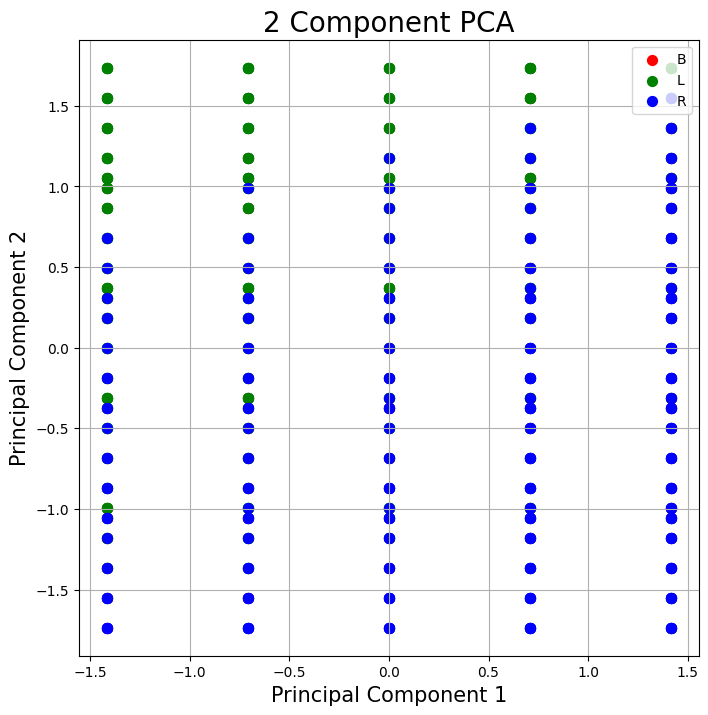

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['B', 'L', 'R']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Kode di atas digunakan untuk membuat plot dua dimensi dari hasil transformasi PCA. Sebuah gambar (figure) dengan ukuran 8x8 dibuat, kemudian sebuah subplot ditambahkan di dalamnya. Label sumbu x dan y diberi nama 'Principal Component 1' dan 'Principal Component 2', sementara judul plot ditetapkan sebagai '2 Component PCA'.

Setelah itu, dilakukan plotting titik-titik pada plot untuk setiap class (B, L, dan R) dengan menggunakan warna merah, hijau, dan biru secara berturut-turut. Dalam proses looping, setiap kategori diberi label dan diwakili dengan warna yang sesuai. Scatter plot digunakan untuk menampilkan distribusi data hasil PCA dalam ruang dua dimensi.

In [22]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.25 0.25]
0.5000000000000003


Kode tersebut mencetak nilai rasio varians yang dijelaskan oleh setiap pca. Dalam kasus ini, komponen utama pertama (Principal Component 1) maupun komponen utama kedua (Principal Component 2) mampu menjelaskan 25% varians dalam data. Oleh karena itu, kedua komponen ini bersama-sama dapat menjelaskan sekitar 50% varians dalam total dataset.

### Kesimpulan
Dari hasil ini, dapat disimpulkan bahwa kombinasi dari kedua komponen utama tersebut mampu menjelaskan sekitar setengah dari varians dalam dataset yang digunakan. Ini menunjukkan bahwa informasi dari data asli dipertahankan secara signifikan dalam representasi berdimensi rendah yang dihasilkan oleh PCA. Namun, masih ada sekitar 50% varians lainnya yang tidak dijelaskan oleh kedua komponen utama ini. Oleh karena itu, ada potensi kehilangan informasi yang cukup besar jika hanya menggunakan dua komponen utama ini sebagai representasi dari keseluruhan dataset balance scale.